In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/parkinsons-disease-data-set/parkinsons.data


In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,SGDClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,classification_report,precision_score, f1_score, roc_auc_score
from sklearn.tree import plot_tree
from scipy.stats import mode
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
    

import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv("/kaggle/input/parkinsons-disease-data-set/parkinsons.data")

In [7]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [8]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [18]:
df.head(5)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [9]:
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [11]:
df['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [12]:
df.drop(columns=['name', 'MDVP:Jitter(Abs)'], inplace=True)

In [13]:
class_counts = df["status"].value_counts()
min_class = class_counts.idxmin()
min_count = class_counts.min()


df_balanced = (
    df.groupby("status")
    .apply(lambda x: x.sample(min_count, random_state=42))
    .reset_index(drop=True)
)

print(df_balanced["status"].value_counts())

status
0    48
1    48
Name: count, dtype: int64


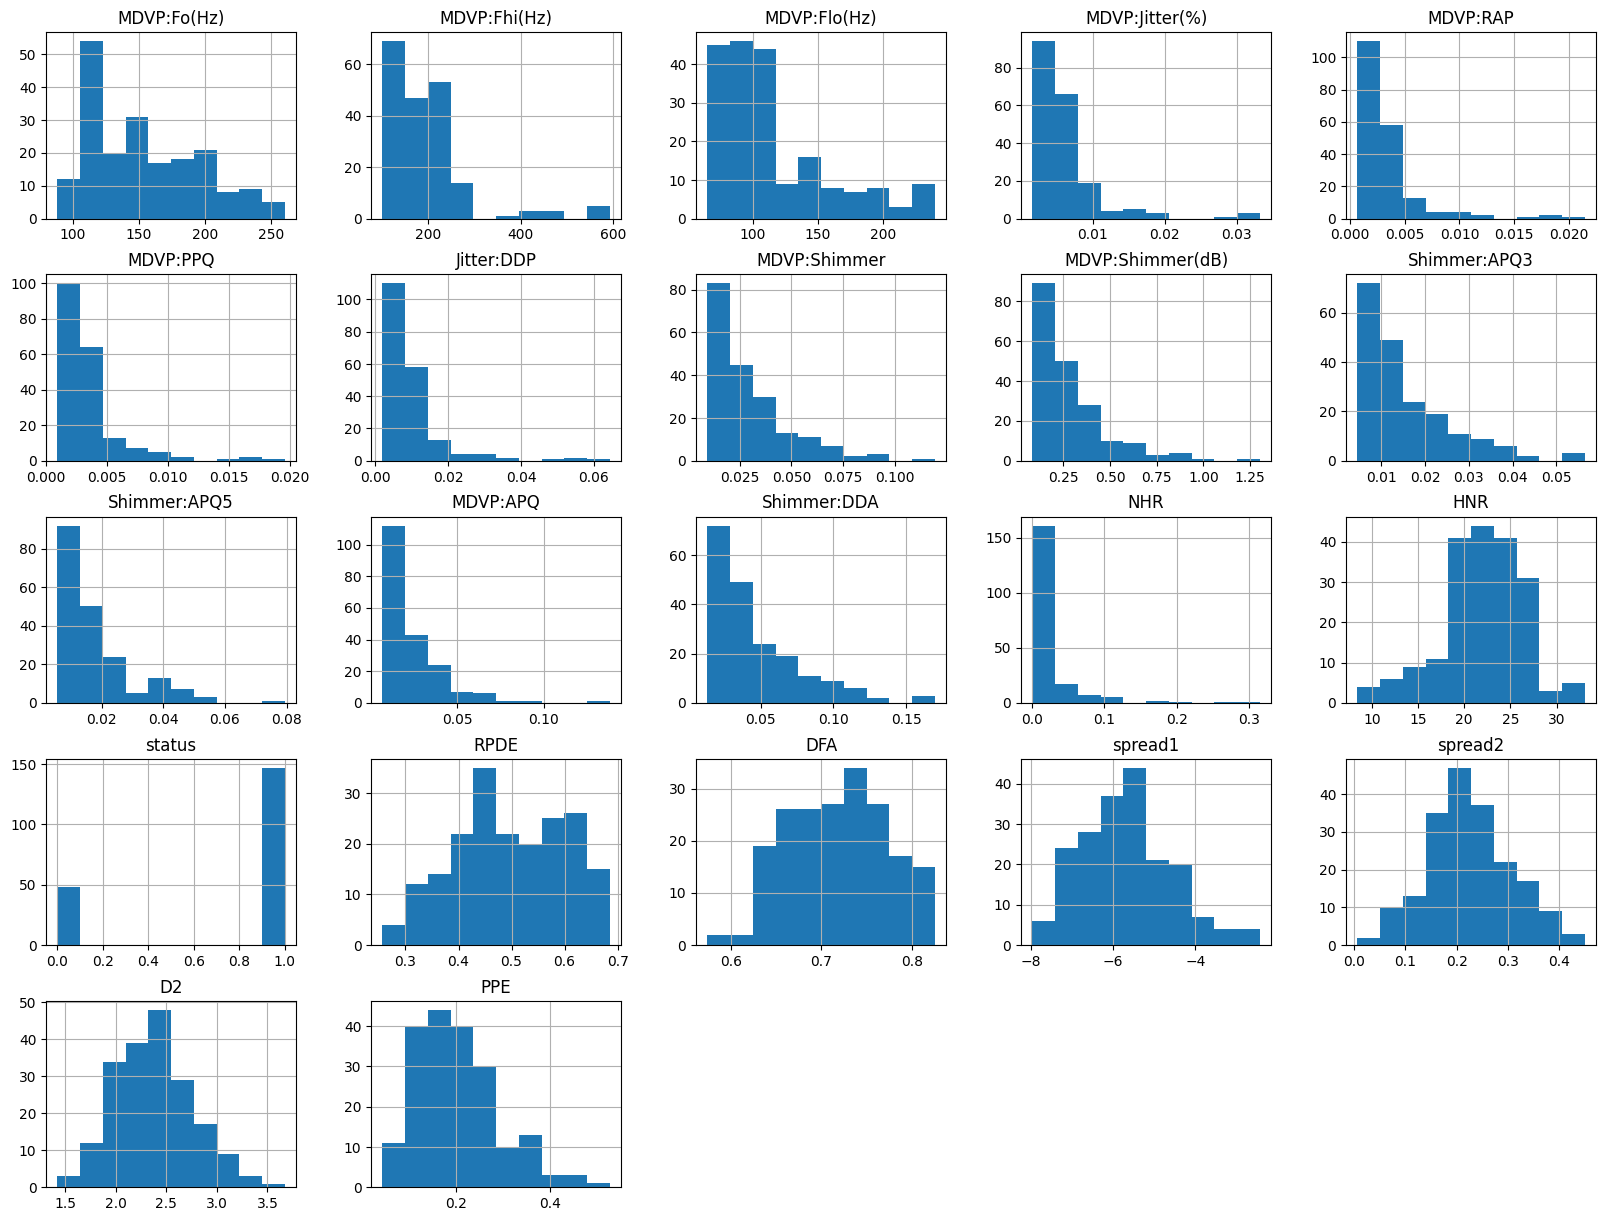

In [14]:
df.hist(figsize=(20,15));

In [15]:
X = df.drop(columns='status')
y=df['status']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(117, 21)
(117,)
(78, 21)
(78,)


In [16]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=4),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel="linear", random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "Stochastic Gradient Descent": SGDClassifier(loss="log_loss", random_state=42)
}

# Store results in a list
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    results.append([name, round(train_score, 4), round(test_score, 4)])

# Convert results to DataFrame and print
df_results = pd.DataFrame(results, columns=["Model", "Train Accuracy", "Test Accuracy"])
df_results.sort_values(by="Test Accuracy", ascending=False, inplace=True)
df_results.reset_index(drop=True, inplace=True)
print(df_results)

                         Model  Train Accuracy  Test Accuracy
0                Random Forest          1.0000         0.9231
1                      XGBoost          1.0000         0.9231
2            Gradient Boosting          1.0000         0.8974
3                Decision Tree          0.9915         0.8718
4          Logistic Regression          0.8632         0.8590
5       Support Vector Machine          0.8632         0.8590
6          K-Nearest Neighbors          0.9060         0.8205
7  Stochastic Gradient Descent          0.7863         0.7436


In [17]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("Random Forest Test Accuracy:", accuracy_score(y_test, y_pred))

Random Forest Test Accuracy: 0.9230769230769231


In [19]:
features = df.loc[:, df.columns != 'status'].values[:, 1:] 
labels = df.loc[:, 'status'].values
df['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

scaler = MinMaxScaler((-1, 1))
x = scaler.fit_transform(features)
y = labels
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15)
model = XGBClassifier()


In [22]:
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [23]:
y_prediction = model.predict(x_test)
print("Accuracy Score is", accuracy_score(y_test, y_prediction) * 100)

Accuracy Score is 90.0


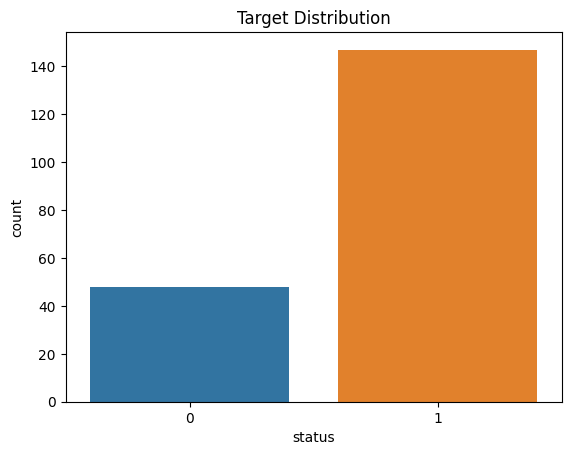

status
1    147
0     48
Name: count, dtype: int64

In [24]:
target_column = 'status'
sns.countplot(x = df[target_column])
plt.title("Target Distribution")
plt.show()
df['status'].value_counts()

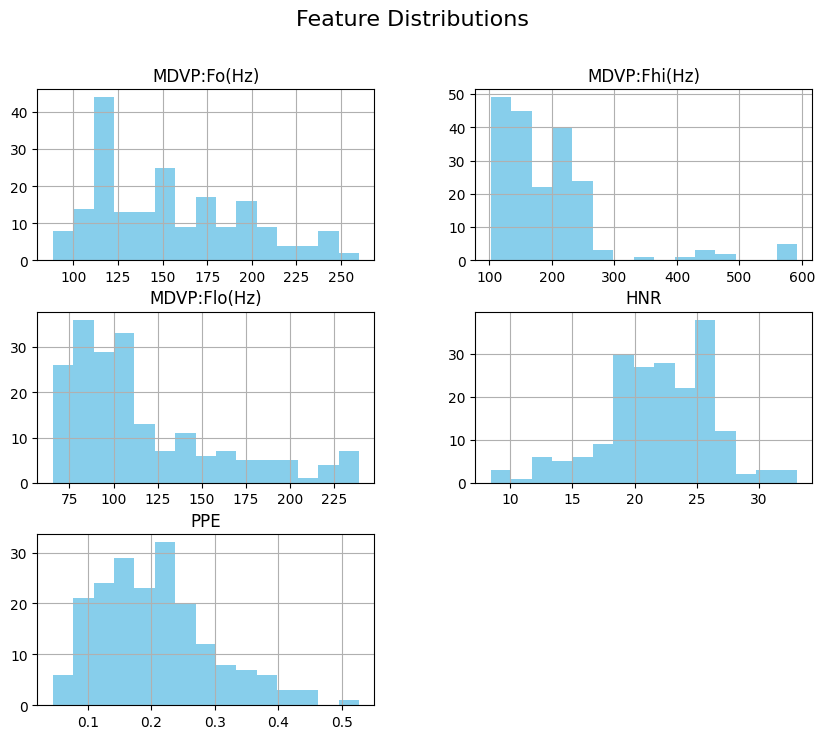

In [25]:
features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'HNR', 'PPE']
df[features].hist(figsize=(10, 8), bins=15, color='skyblue')
plt.suptitle("Feature Distributions", size=16)
plt.show()

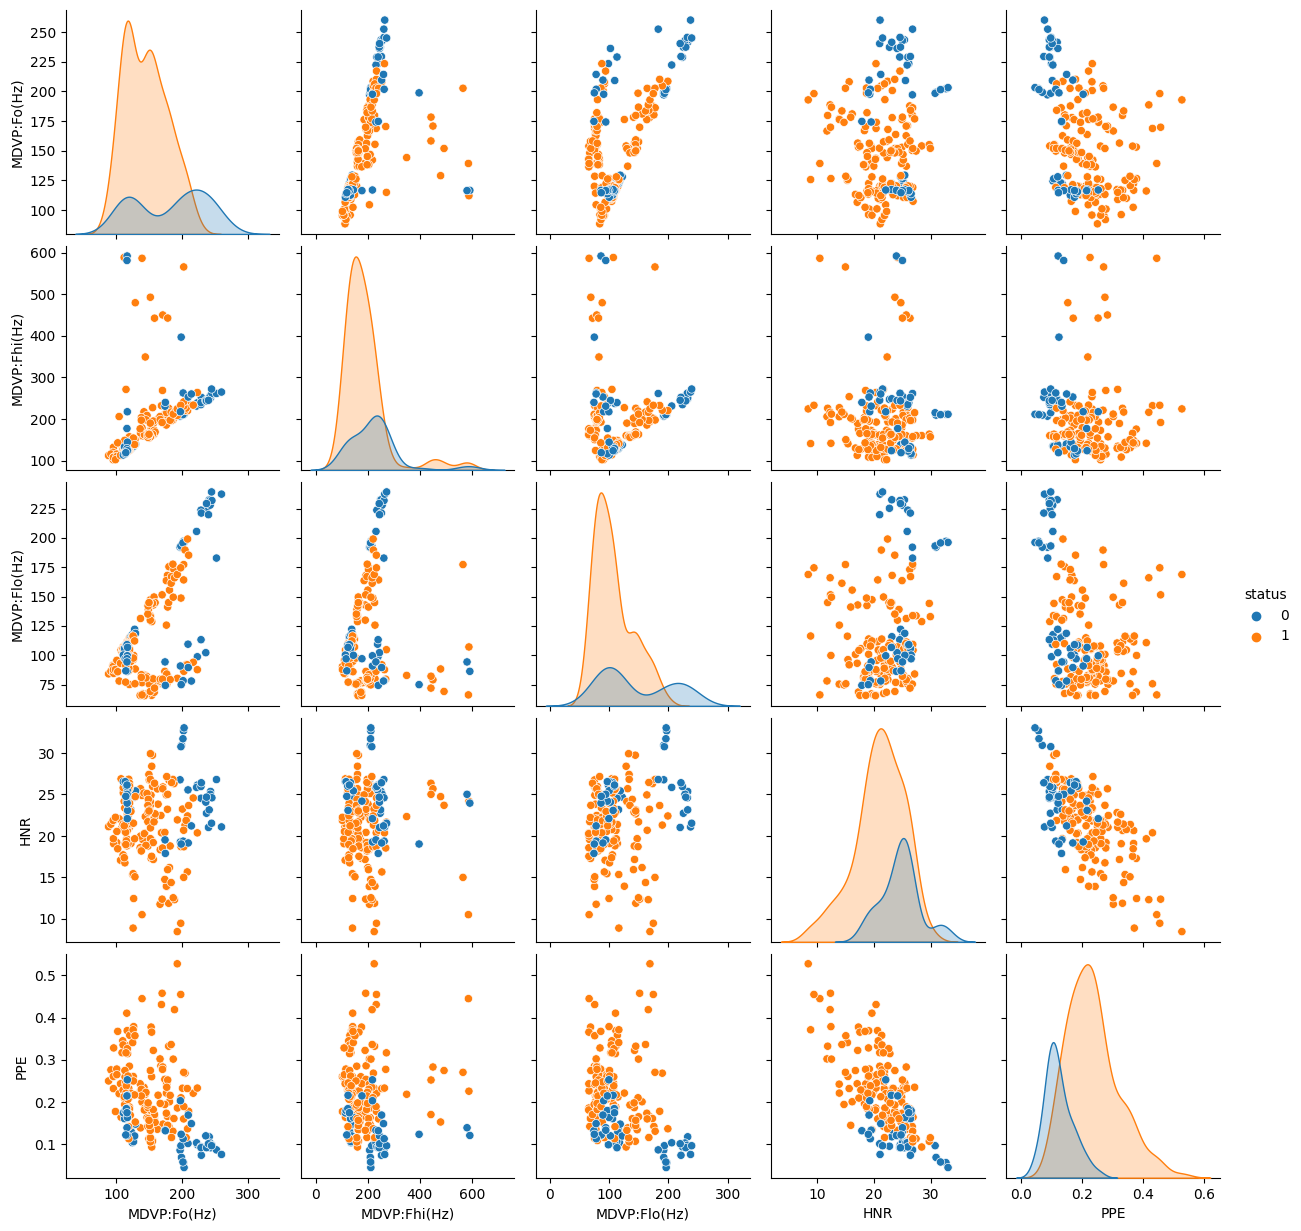

In [28]:
# visualizing the target variable through the pairplot
sns.pairplot(df[features + [target_column]], hue = target_column, diag_kind = "kde")
plt.show()

In [30]:
print(df.columns)


Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer',
       'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ',
       'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')


In [31]:
# data = df.drop(columns=['name'])  # This line is not needed
data = df  # Use the original DataFrame if you don't need to drop anything
X = data.drop(columns=['status'])
y = data['status']

# scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.tree import DecisionTreeClassifier


dt_model = DecisionTreeClassifier(random_state=42) 

# Train the Decision Tree model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [33]:
# predictions
# Importing the Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
dt_model.fit(X_train, y_train)

# Make predictions using the trained Decision Tree model
y_pred = dt_model.predict(X_test)  # Predictions (class labels)
y_pred_proba = dt_model.predict_proba(X_test)  # Predicted probabilities for each class

# Output the predictions and probabilities
print("Predictions (class labels):", y_pred)
print("Predicted probabilities:", y_pred_proba)

Predictions (class labels): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1
 1 1]
Predicted probabilities: [[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
dt_model.fit(X_train, y_train)

# Make predictions using the trained Decision Tree model
y_pred = dt_model.predict(X_test)  # Predictions (class labels)
y_pred_proba = dt_model.predict_proba(X_test)[:, 1]  # Use probability of the positive class

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)  # Accuracy
confusion = confusion_matrix(y_test, y_pred)  # Confusion Matrix
classification = classification_report(y_test, y_pred)  # Classification Report
roc_auc = roc_auc_score(y_test, y_pred_proba)  # ROC-AUC Score

# Display results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification)
print("ROC-AUC Score:", roc_auc)

Accuracy: 0.9230769230769231
Confusion Matrix:
 [[ 5  2]
 [ 1 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39

ROC-AUC Score: 0.8415178571428571


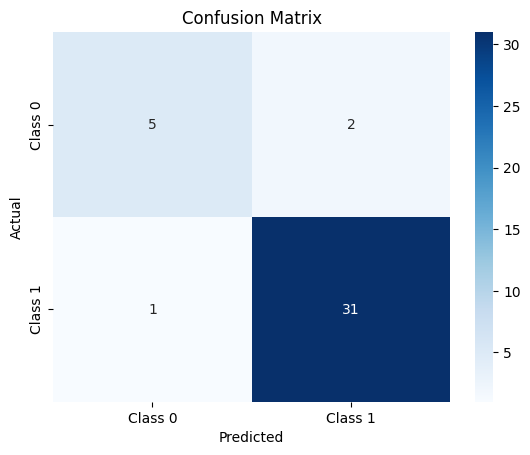

In [35]:
# Confusion matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
dt_model.fit(X_train, y_train)

# Make predictions using the trained Decision Tree model
y_pred = dt_model.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

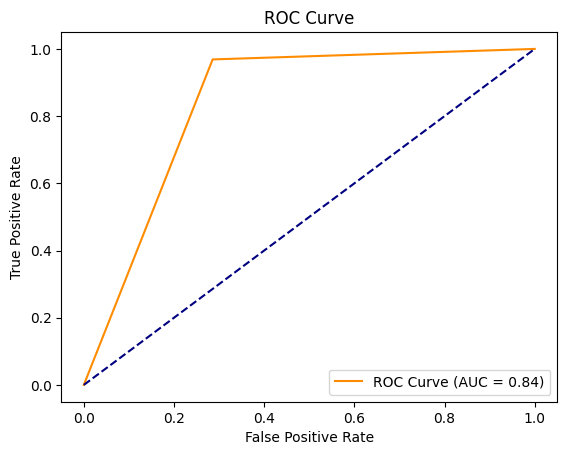

In [36]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

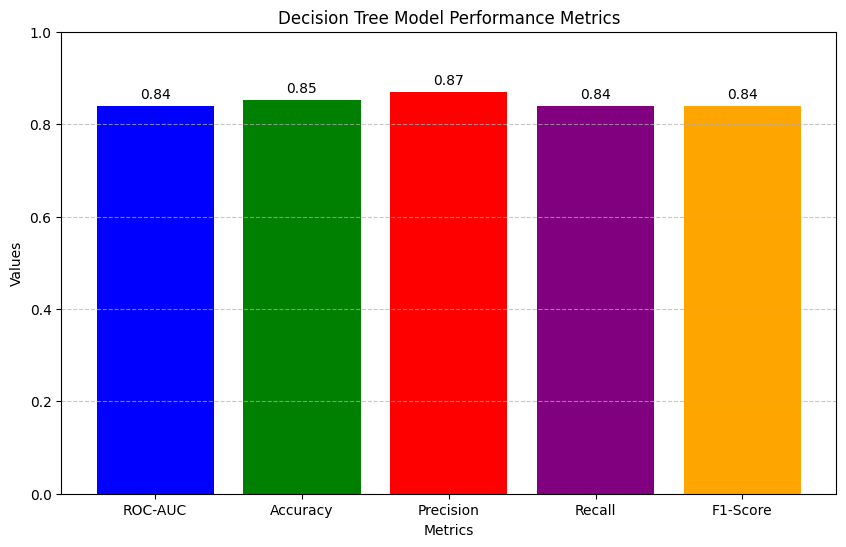

In [38]:
import matplotlib.pyplot as plt
# Metrics and their corresponding values
metrics = ['ROC-AUC', 'Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [0.84, 0.852, 0.87, 0.84, 0.84]
# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple', 'orange'])

# Add title and labels
plt.title('Decision Tree Model Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

# Display the plot
plt.ylim(0, 1)  # Set y-axis limits
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [39]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
svm_model.fit(X_train, y_train)

SVC(probability=True)

In [40]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
dt_model.fit(X_train, y_train)

# Make predictions using the trained Decision Tree model
y_pred = dt_model.predict(X_test)  # Predictions (class labels)
y_pred_proba = dt_model.predict_proba(X_test)  # Predicted probabilities for each class

# Output the predictions and probabilities
print("Predictions (class labels):", y_pred)
print("Predicted probabilities:", y_pred_proba)

Predictions (class labels): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1
 1 1]
Predicted probabilities: [[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
dt_model.fit(X_train, y_train)

# Make predictions using the trained Decision Tree model
y_pred = dt_model.predict(X_test)  # Predictions (class labels)
y_pred_proba = dt_model.predict_proba(X_test)[:, 1]  # Use probability of the positive class

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)  # Accuracy
confusion = confusion_matrix(y_test, y_pred)  # Confusion Matrix
classification = classification_report(y_test, y_pred)  # Classification Report
roc_auc = roc_auc_score(y_test, y_pred_proba)  # ROC-AUC Score

# Display results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification)
print("ROC-AUC Score:", roc_auc)

Accuracy: 0.9230769230769231
Confusion Matrix:
 [[ 5  2]
 [ 1 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39

ROC-AUC Score: 0.8415178571428571


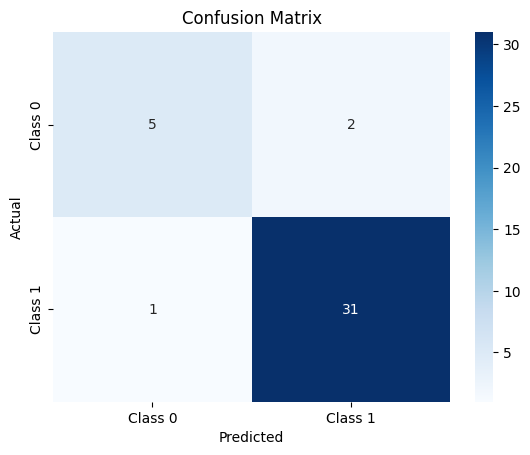

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
dt_model.fit(X_train, y_train)

# Make predictions using the trained Decision Tree model
y_pred = dt_model.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

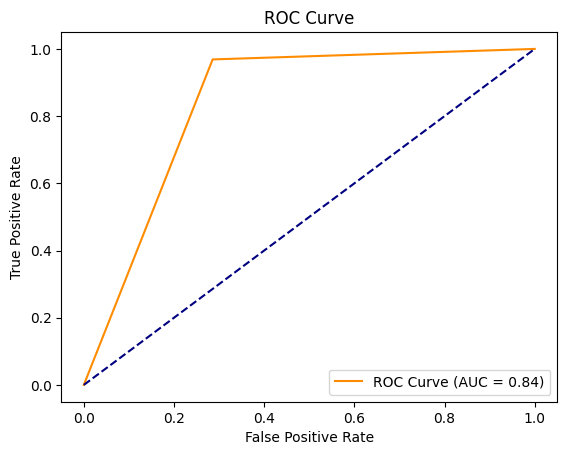

In [43]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

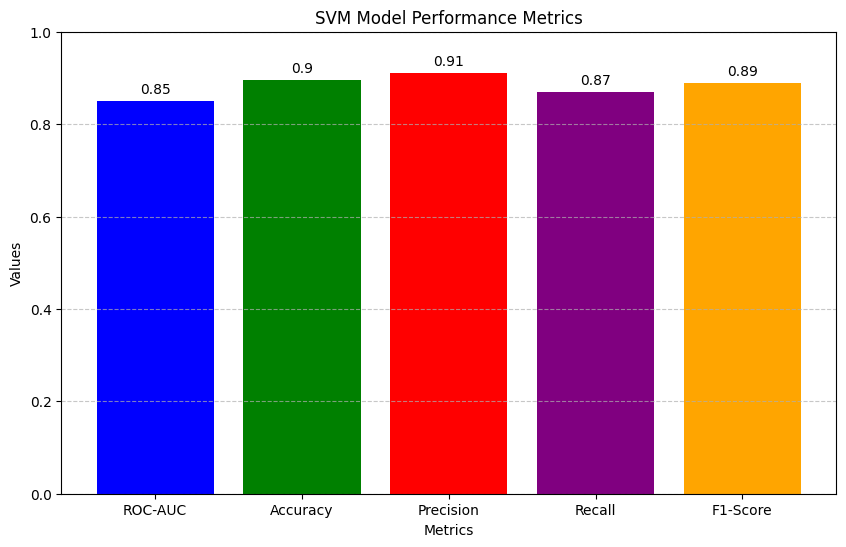

In [44]:
import matplotlib.pyplot as plt
# Metrics and their corresponding values
metrics = ['ROC-AUC', 'Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [0.85, 0.895, 0.91, 0.87, 0.89]
# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple', 'orange'])

# Add title and labels
plt.title('SVM Model Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

# Display the plot
plt.ylim(0, 1)  # Set y-axis limits
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [46]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators and other hyperparameters

# Train the Random Forest model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)
# evaluating the model
# Predictions for evaluation
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Use probability of the positive class

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)  # Accuracy
confusion = confusion_matrix(y_test, y_pred)  # Confusion Matrix
classification = classification_report(y_test, y_pred)  # Classification Report
roc_auc = roc_auc_score(y_test, y_pred_proba)  # ROC-AUC Score

# Display results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification)
print("ROC-AUC Score:", roc_auc)

Accuracy: 0.9487179487179487
Confusion Matrix:
 [[ 5  2]
 [ 0 32]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39

ROC-AUC Score: 0.9241071428571428


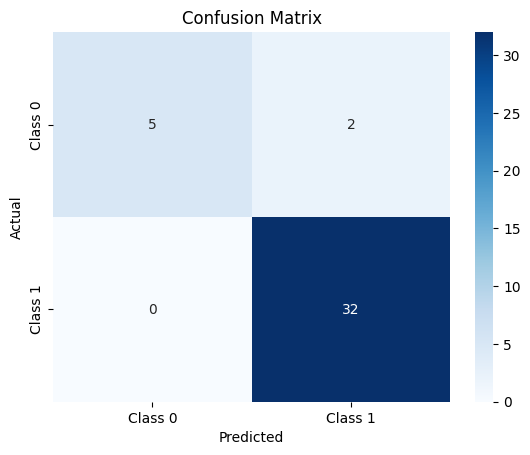

In [50]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

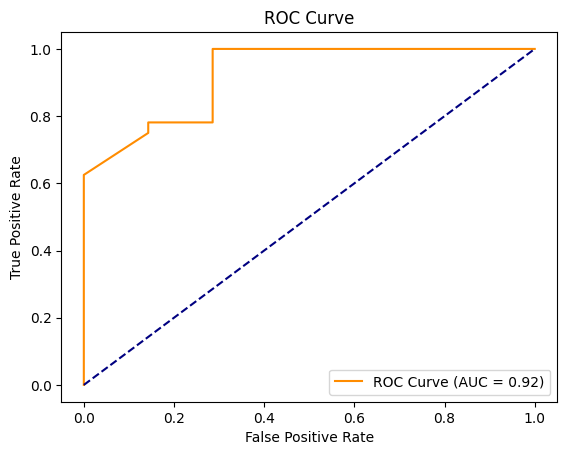

In [51]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

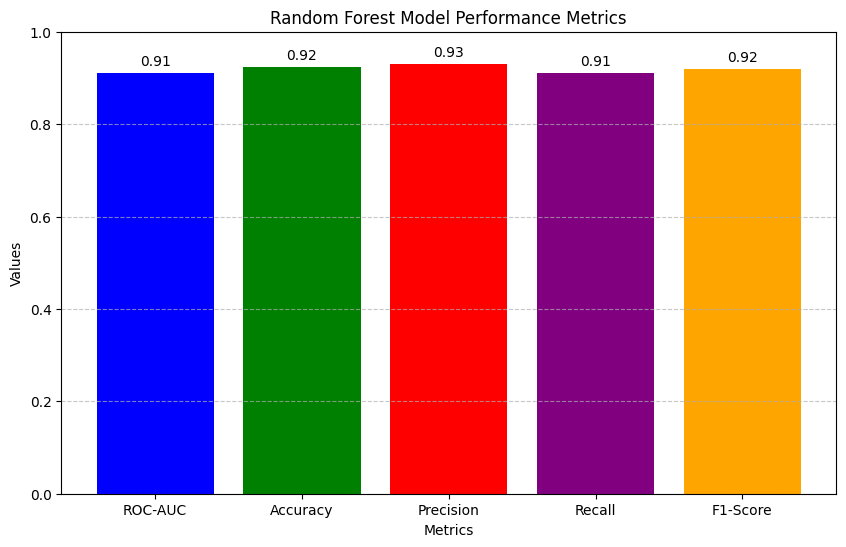

In [52]:
import matplotlib.pyplot as plt
# Define metrics and values
metrics = ['ROC-AUC', 'Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [0.91, 0.923, 0.93, 0.91, 0.92]  # Accuracy is converted to decimal form (92.3% -> 0.923)
# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple', 'orange'])

# Add title and labels
plt.title('Random Forest Model Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

# Display the plot
plt.ylim(0, 1)  # Set y-axis limits (since all values are between 0 and 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [56]:
df_copy = df.copy()

df_copy = df_copy.sort_index(axis=1)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   D2                195 non-null    float64
 1   DFA               195 non-null    float64
 2   HNR               195 non-null    float64
 3   Jitter:DDP        195 non-null    float64
 4   MDVP:APQ          195 non-null    float64
 5   MDVP:Fhi(Hz)      195 non-null    float64
 6   MDVP:Flo(Hz)      195 non-null    float64
 7   MDVP:Fo(Hz)       195 non-null    float64
 8   MDVP:Jitter(%)    195 non-null    float64
 9   MDVP:PPQ          195 non-null    float64
 10  MDVP:RAP          195 non-null    float64
 11  MDVP:Shimmer      195 non-null    float64
 12  MDVP:Shimmer(dB)  195 non-null    float64
 13  NHR               195 non-null    float64
 14  PPE               195 non-null    float64
 15  RPDE              195 non-null    float64
 16  Shimmer:APQ3      195 non-null    float64
 1

In [59]:
mdvp = df_copy.iloc[:, 5:15]
mdvp.head()

,MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Fo(Hz),MDVP:Jitter(%),MDVP:PPQ,MDVP:RAP,MDVP:Shimmer,MDVP:Shimmer(dB),NHR,PPE
0,157.302,74.997,119.992,0.00784,0.00554,0.00370,0.04374,0.426,0.02211,0.284654
1,148.650,113.819,122.400,0.00968,0.00696,0.00465,0.06134,0.626,0.01929,0.368674
2,131.111,111.555,116.682,0.01050,0.00781,0.00544,0.05233,0.482,0.01309,0.332634
3,137.871,111.366,116.676,0.00997,0.00698,0.00502,0.05492,0.517,0.01353,0.368975
4,141.781,110.655,116.014,0.01284,0.00908,0.00655,0.06425,0.584,0.01767,0.410335


In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

def check_linear_relation(feature, label):
    temp = df_copy.dropna()
    
    X = temp[[feature]]  # keep it as DataFrame
    y = temp[label]      # Series
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    # predict on the test set
    y_pred = model.predict(X_test)

    # calculate R-squared
    r2 = r2_score(y_test, y_pred)
    print(feature, "→", label)
    print("R-squared:", r2)

    # print equation
    print("Equation: y = {:.4f} * x + {:.4f}".format(model.coef_[0], model.intercept_))

    # plot regression
    impute_df = pd.DataFrame({'org': y, 'pre': model.predict(X)})
    sns.regplot(x='org', y='pre', data=impute_df, line_kws=dict(color="r"))
    plt.xlabel(label)
    plt.ylabel("Predicted " + label)
    plt.title(f"Regression: {feature} vs {label}")
    plt.show()

    return model.coef_[0], model.intercept_


MDVP:Jitter(%) → MDVP:RAP
R-squared: 0.9247059209347499
Equation: y = 0.6084 * x + -0.0005


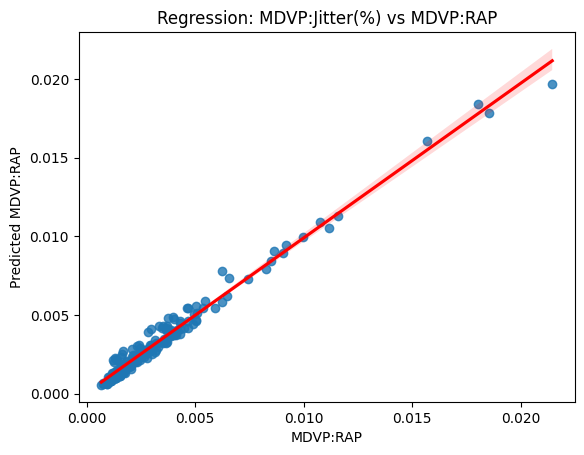

In [63]:
coef, inter = check_linear_relation('MDVP:Jitter(%)', 'MDVP:RAP')


In [64]:
def custom_fill(row, fill_column, target_column, multiplier, constant):
    if pd.isna(row[fill_column]):
        return row[target_column] * multiplier + constant
    else:
        return row[fill_column]

# test the function
dummy_data = {
    'Column1': [1, 2, np.nan, 4, 5],
    'Column2': [np.nan, 1.5, 2.5, np.nan, 5.5],
    'Column3': [3, np.nan, 1, 2, np.nan]
}

dummy_df = pd.DataFrame(dummy_data)
dummy_df['Column3_filled'] = dummy_df.apply(lambda row: custom_fill(row, 'Column3', 'Column2', 2, 1), axis=1)

dummy_df

,Column1,Column2,Column3,Column3_filled
0,1.0,NaN,3.0,3.0
1,2.0,1.5,NaN,4.0
2,NaN,2.5,1.0,1.0
3,4.0,NaN,2.0,2.0
4,5.0,5.5,NaN,12.0


MDVP:Shimmer(dB) → MDVP:Shimmer
R-squared: 0.9699699806719457
Equation: y = 0.0949 * x + 0.0029


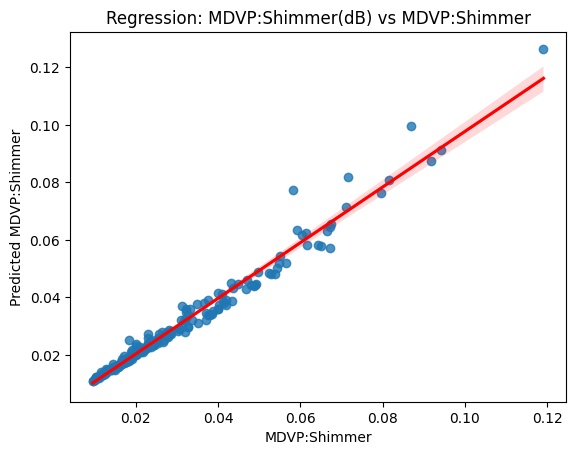

(0.09485202333882786, 0.002932385827742412)

In [66]:
check_linear_relation('MDVP:Shimmer(dB)', 'MDVP:Shimmer')
